In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
kbolc = 1.381 * 1e-23
L = 10 #* 1e-2
sigma_dx=0.05 #* 1e-3
sigma_t= 0.1
sigma_T = 0.1
ro_glass = 2.5 #* 1e3
T_glass = np.array([20.6 , 20.6 , 25.0,25.0, 29.8, 29.8 , 34.9 , 34.9 , 40.4 , 40.4, 45.0, 45.0 , 50.0, 50.0])
t1_glass = np.array([15.2, 15.5 , 13.6,13.6 , 9.9, 9.4 , 6.2 , 6.3 , 4.6 , 4.7, 3.7 , 3.3, 2.9 , 2.8])
t2_glass = np.array([30.9, 31.4 , 27.2,27.2, 20.0 , 18.8 , 11.9 , 12.2, 8.7, 8.7 , 7.2 , 6.7, 5.9, 5.6])
dx_glass = np.array([2.05,2.0,2.1,2.1,2.05,2.15,2.00,2.00,2.05,2.0,2.1,2.1,2.05,2.1])

In [84]:
ro_glass = 7.8 #* 1e3
T_glass = np.array([21.7,24.9,25.0,30.0,30.0,34.9,35.0, 40.3, 40.4, 45.0, 45.0, 50.0, 50.0])
t1_glass = np.array([21.6,18.6,14.6,10.0,9.3,6.0,7.9,4.9,6.7,4.6,6.2,4.7,3.4])
t2_glass= np.array([43.2,36.0,29.3,20.8,19.5,12.3,14.5,10.3,13.6,10.1,12.1,9.5,6.8])
dx_glass=np.array([0.8,0.77,0.9,0.83,0.85,0.9,0.83,0.8,0.75,0.73,0.7,0.7,0.7])


In [85]:
n = 13
s = ''
for i in range(n+1):
    s += '|c'
print(s)

|c|c|c|c|c|c|c|c|c|c|c|c|c|c


In [86]:
def get_vst(t1,t2):
    return L / (t2 - t1)
vst_glass = get_vst(t1_glass,t2_glass)
vst_ir = get_vst(t1_ir,t2_ir)

In [94]:
def get_s(X,i):
    if i <= 0:
        i = 2
    s = ''
    for x in X:
        s += '&' + str(round(x,i)) + ' '
    return s

print(get_s(T_glass,1))
print(get_s(t1_glass,1))
print(get_s(t2_glass,1))
print(get_s(dx_ir,2))
print(get_s(vst_glass,2))

&21.7 &24.9 &25.0 &30.0 &30.0 &34.9 &35.0 &40.3 &40.4 &45.0 &45.0 &50.0 &50.0 
&21.6 &18.6 &14.6 &10.0 &9.3 &6.0 &7.9 &4.9 &6.7 &4.6 &6.2 &4.7 &3.4 
&43.2 &36.0 &29.3 &20.8 &19.5 &12.3 &14.5 &10.3 &13.6 &10.1 &12.1 &9.5 &6.8 
&0.8 &0.77 &0.9 &0.83 &0.85 &0.9 &0.83 &0.8 &0.75 &0.73 &0.7 &0.7 &0.7 
&0.46 &0.57 &0.68 &0.93 &0.98 &1.59 &1.52 &1.85 &1.45 &1.82 &1.69 &2.08 &2.94 


In [88]:
def rho_glic(t):
    return 1e-3 * (1275.4 - (1275.4 - 1269.4)/ 10.0 * t)
def get_rho_glic(T):
    return np.array([round(rho_glic(t),3) for t in T])

In [95]:
g = 9.8
def get_eta(r,rho,rho_l,v_st):
    return 2.0/9.0 * g * r**2 * (rho - rho_l)/v_st
def get_eta_eps(e_t,e_r):
    return (0.05**2 + 4 * e_r**2 + e_t**2)**0.5
def get_tau(r,rho,eta):
    return 2/9 * r**2*rho/eta
def get_RE(v_st,rho_l,r,eta):
    return v_st * 1e-2 * rho_l*1e6 * r*1e-2 / eta

In [96]:
rho_glic_glass = get_rho_glic(T_glass)
print(get_s(rho_glic_glass,3))

&1.262 &1.26 &1.26 &1.257 &1.257 &1.254 &1.254 &1.251 &1.251 &1.248 &1.248 &1.245 &1.245 


In [97]:
eta_glass = get_eta(dx_glass,ro_glass, rho_glic_glass,vst_glass) * 1e2
eps_eta_glass = get_eta_eps(sigma_t/(t2_glass - t1_glass), sigma_dx/dx_glass)
sigma_eta_glass = eps_eta_glass * eta_glass 
eta_glass_mid = np.array([(eta_glass[int(2*i)] +  eta_glass[int(2*i + 1)])/2 for i in range(int(len(eta_glass)/2))])
T_glass_mid = np.array([(T_glass[2*i] +  T_glass[2*i + 1])/2 for i in range(int(len(T_glass)/2))])
eps_eta_glass_mid = np.array([(eps_eta_glass[int(2*i)]**2 +  eps_eta_glass[int(2*i + 1)]**2)**0.5/2 for i in range(int(len(eta_glass)/2))])
sigma_glass_mid = np.array([(sigma_eta_glass[int(2*i)]**2 +  sigma_eta_glass[int(2*i + 1)]**2)**0.5/2 for i in range(int(len(eta_glass)/2))])

print(get_s(eta_glass,1))
print(get_s(eps_eta_glass,3))
print(get_s(sigma_eta_glass,1))
print(get_s(get_tau(dx_glass,ro_glass,eta_glass) * 1e2, 3))
print(get_s(get_RE(vst_glass,rho_glic_glass,dx_glass,eta_glass),1))

&1968.3 &1469.3 &1695.9 &1060.2 &1050.1 &727.5 &648.2 &492.9 &553.6 &418.2 &412.5 &335.8 &237.8 
&0.135 &0.139 &0.122 &0.131 &0.128 &0.123 &0.131 &0.136 &0.143 &0.147 &0.152 &0.153 &0.154 
&265.1 &204.7 &207.0 &138.6 &134.6 &89.4 &85.1 &67.0 &79.2 &61.5 &62.8 &51.3 &36.7 
&0.056 &0.07 &0.083 &0.113 &0.119 &0.193 &0.184 &0.225 &0.176 &0.221 &0.206 &0.253 &0.357 
&0.0 &0.0 &0.0 &0.1 &0.1 &0.2 &0.2 &0.4 &0.2 &0.4 &0.4 &0.5 &1.1 


[ 0.59662896  0.28736672  0.29250806  0.86831024  0.56951899]
[ 0.13185152  0.12602397  0.12966108  0.13946061  0.14884662]
[ 0.22099417  0.43854755  0.44327352  0.16061149  0.26135498]
[ 7.4493942   7.22840003  6.78985247  6.34657896  6.18596746  5.92461248]
5906.80743399
293.463992159
0.0496823360908
8.15730106634e-20
4.05273773171e-21


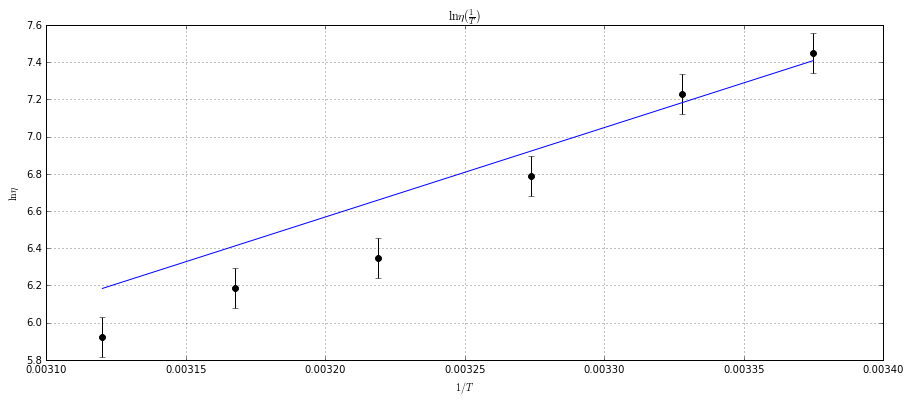

In [92]:
def build_plot(eta, T):
    plt.figure(figsize=(15,6))
    plt.grid(True)
    plt.title(r'$\ln \eta (\frac{1}{T})$')
    OX = 1/(T+273)
    sigm_OX = sigma_T / (T+273)**2
    OY = np.log(eta)
    dy_dx = np.array([(OY[i+1]-OY[i])/(OX[i+1]-OX[i]) for i in range(len(OX)-1)])
    k = np.mean(dy_dx)
    dX = np.array([abs(OX[i+1]-OX[i]) for i in range(len(OX)-1)])
    dY = np.array([abs(OY[i+1]-OY[i]) for i in range(len(OX)-1)])
    T = np.array(T)
    sigm_dx = np.array([(sigm_OX[i+1]**2+ sigm_OX[i]**2)**0.5 for i in range(len(OX)-1)])
    eps_dx = sigm_dx/dX
    sigm_logeta = eps_eta_glass_mid
#     eps_log_eta = sigm_logeta/
#     print(eps_log_eta)
    sigm_dy = np.array([(sigm_logeta[i+1]**2 + sigm_logeta[i]**2)**0.5 for i in range(len(OX)-1)])
    eps_dy = sigm_dy/dY
    print(eps_dy)
    print(sigm_dy)
    print(dY)    
    print(OY)

#     print('xx')
#     print(eps_dy)
    eps_dy_dx = (eps_dx**2 + eps_dy**2)**0.5
    sigm_dy_dx = eps_dy_dx * dy_dx
    sigma_k = np.var(sigm_dy_dx) ** 0.5
    eps_k = sigma_k / k
    print(k)
    print(sigma_k)
    print(eps_k)
#     print(sigm_logeta)
#     eps_log_eta = sigm_logeta/np.log(eta)
#     print(eps_log_eta)

#     eps_T = sigma_T/(T+273)
    

    b = np.mean([OY[i] - k * (OX[i] - OX[0]) for i in range(len(OX))])
    plt.plot(OX,OY,'o',color='black')
    plt.plot([OX[0],OX[-1]], [b,b + (OX[-2] - OX[0])*k])
#     print(k)
#     sigm_ln_eta = (np.var(sigma_eta_glass/eta_glass))**0.5
#     eps_k = (eps_log_eta**2 +  eps_T**2)**0.5
#     print(eps_k)
#     plt.xlim(0,0.050)
    plt.errorbar(OX,OY, xerr=0, yerr= np.max(sigm_logeta), fmt='o',color = 'black')
    plt.xlabel(r'$1/T$')
    plt.ylabel(r'$\ln \eta$')
    plt.savefig('g2.png')
    W = kbolc * k
    print(W)
    print(W * eps_k)
build_plot(eta_glass_mid,T_glass_mid)